[[-1  2]
 [ 1 -1]
 [ 1  1]
 [-2  0]
 [11 12]
 [ 8  9]
 [12  8]
 [ 9 11]]
Labels=  [1 1 1 1 0 0 0 0]


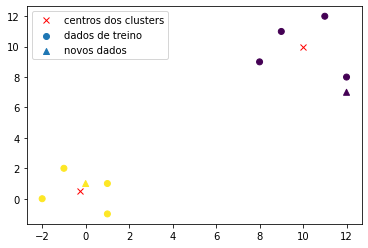

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#Exemplo 1:Uma aplicação rápida de kmeans, com dados criados manualmente
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#define a entrada com dois conjuntos
#Um em torno de [0,0] e outro em [10,10]]
X = np.array([[-1, 2], [1, -1], [1, 1], [-2, 0],
              [11, 12], [8, 9], [12, 8],[9, 11]])
print(X)
#Agrupa a entrada em 2 clusters
kmeans = KMeans(n_clusters=2).fit(X)
#define a entrada de teste
Xtest = np.array([[0, 1], [12, 7]])
#Mostra em que Cluster cada entrada foi classificada
print('Labels= ',kmeans.labels_)
#obtem onde foram encontrados os centros de cada cluster
centros=kmeans.cluster_centers_
#fazendo um gráfico que marca os labels em cores
plt.figure()
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,label='dados de treino')
plt.plot(centros[:,0],centros[:,1],'rx',label='centros dos clusters')
plt.scatter([0, 12], [1, 7],marker='^',
            c=kmeans.predict(Xtest),label='novos dados')
plt.legend()

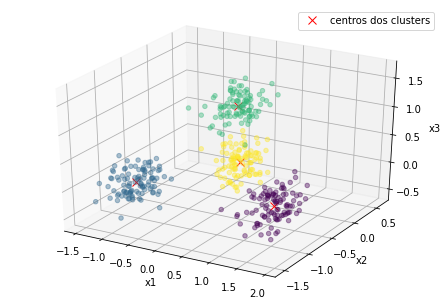

In [2]:
#Exemplo 2: k-means com dataset de 3 dimensões importados em csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X = np.genfromtxt('data_set_k_means.csv', delimiter=',')
#Agrupa a entrada em 4 clusters
kmeans = KMeans(n_clusters=4,max_iter=200, random_state=0).fit(X)

#obtem onde foram encontrados os centros de cada cluster
centros=kmeans.cluster_centers_
#fazendo um gráfico 3D dos clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2],c=kmeans.labels_,alpha=0.4)
ax.plot(centros[:,0],centros[:,1],centros[:,2],'rx',markersize=8,label='centros dos clusters')
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_zlabel('x3')
plt.legend()


In [3]:
#gera um data_set com 3 clusters em 3 dimensões em CSV
import numpy as np
n_amostras = 100
#desvio padrão, define se os pontos de um cluster
#irão se espalhar para os outros clusters
desv=0.2
data = np.concatenate((
    np.random.normal((-1, -1, 0),(desv, desv, desv), size=(n_amostras, 3)),
    np.random.normal((0, 0, 0),(desv, desv, desv), size=(n_amostras, 3)),
    np.random.normal((1.5, -1, 0),(desv, desv, desv), size=(n_amostras, 3)),
    np.random.normal((0, 0, 1),(desv, desv, desv), size=(n_amostras, 3))
))
np.savetxt('data_set_k_means.csv', data, delimiter=',')
#print(data)